In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_sz = 50
split_rate = 0.2
celcius = np.round(np.random.uniform(-273,100,sample_sz))
farenheit = np.round((9/5)*celcius+32)
celcius,farenheit

(array([ -55.,   -4., -135., -187., -152., -187., -211.,  -14., -140.,
        -187.,   91., -147.,   23.,  -78., -149., -232.,   38., -131.,
          21., -128., -149.,   10.,  -51.,  -16.,  -16.,  100., -134.,
          27., -159.,   79.,  -90., -233.,   52.,   47.,   11.,  -70.,
        -189.,   22.,   94., -242.,   13., -200.,  -51., -201., -238.,
          97., -194., -112., -141., -113.]),
 array([ -67.,   25., -211., -305., -242., -305., -348.,    7., -220.,
        -305.,  196., -233.,   73., -108., -236., -386.,  100., -204.,
          70., -198., -236.,   50.,  -60.,    3.,    3.,  212., -209.,
          81., -254.,  174., -130., -387.,  126.,  117.,   52.,  -94.,
        -308.,   72.,  201., -404.,   55., -328.,  -60., -330., -396.,
         207., -317., -170., -222., -171.]))

In [3]:
celcius = celcius.reshape(-1,1)
celcius_ds = np.concatenate((celcius,np.ones(len(celcius)).reshape(-1,1)), axis=1)


train_X = celcius_ds[:-round(sample_sz*split_rate)]
train_y = farenheit[:-round(sample_sz*split_rate)]

test_X = celcius_ds[-round(sample_sz*split_rate):]
test_y = farenheit[-round(sample_sz*split_rate):]


In [4]:
def theta(X, y):
    '''
        :param X: input 
        :param y: output      
        :return: (X.T*X)^-1*X.T*y
    '''
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [5]:
from matplotlib import pyplot as plt

def gd(X,y,theta,alpha,m,iters_num):       
    '''
        :param X: input 
        :param y: output     
        :param theta: weight which being update     
        :param alpha: learning rate
        :param m: the number of examples
        :param iters_num: the number of iterations
        :return: actual weight
    '''
    xTrans = X.transpose()
    loss_fs = []
    for i in range(0, iters_num):
        h = np.dot(X, theta)
        loss = h - y
        Jcost = np.sum(loss ** 2) / (2 * m)  #J(theta)
        loss_fs.append(Jcost)
        print("Iteration %d | Cost: %f" % (i, Jcost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    plt.plot(range(len(loss_fs)), loss_fs)
    plt.show()
    plt.close()
    return theta

In [6]:
def  sum_of_square_error(fx, y):
    E = y - fx

    return np.dot(E.T,E)

In [7]:
theta_T = theta(train_X,train_y) 
pred_y = np.sum(theta_T*test_X, axis=1) 
# get current error
RSS = sum_of_square_error(pred_y, test_y)

In [8]:
RSS

1.0540479019000304

Iteration 0 | Cost: 21453.950453
Iteration 1 | Cost: 20865.441216
Iteration 2 | Cost: 20300.178238
Iteration 3 | Cost: 19757.243260
Iteration 4 | Cost: 19235.754300
Iteration 5 | Cost: 18734.864212
Iteration 6 | Cost: 18253.759315
Iteration 7 | Cost: 17791.658070
Iteration 8 | Cost: 17347.809808
Iteration 9 | Cost: 16921.493514
Iteration 10 | Cost: 16512.016652
Iteration 11 | Cost: 16118.714045
Iteration 12 | Cost: 15740.946788
Iteration 13 | Cost: 15378.101216
Iteration 14 | Cost: 15029.587904
Iteration 15 | Cost: 14694.840709
Iteration 16 | Cost: 14373.315852
Iteration 17 | Cost: 14064.491035
Iteration 18 | Cost: 13767.864590
Iteration 19 | Cost: 13482.954666
Iteration 20 | Cost: 13209.298446
Iteration 21 | Cost: 12946.451394
Iteration 22 | Cost: 12693.986535
Iteration 23 | Cost: 12451.493759
Iteration 24 | Cost: 12218.579157
Iteration 25 | Cost: 11994.864377
Iteration 26 | Cost: 11779.986017
Iteration 27 | Cost: 11573.595026
Iteration 28 | Cost: 11375.356143
Iteration 29 | Cost: 111

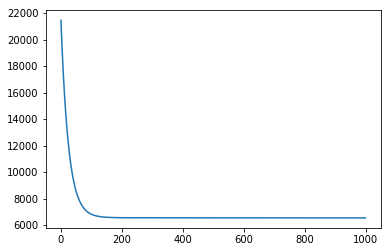

array([173.8934358 ,  17.37023969])

In [9]:
''' By gradient descent'''

m, n = np.shape(train_X)
iters= 1000
alpha = 0.02
theta = np.ones(n)
from sklearn import preprocessing 

X_normalized = preprocessing.normalize(train_X, norm='l2')
# y_normalized = preprocessing.normalize(train_y.reshape(-1,1), norm='l2')
theta_T = gd(X_normalized,train_y,theta, alpha,m,iters)


In [10]:
# the prediction curve
X = np.arange(-273, 100,1)
x = np.concatenate((X.reshape(-1,1), np.ones(len(X)).reshape(-1,1)), axis=1)
fx = np.dot(x, theta_T)

# the actural curve
real_X = np.arange(-273, 100,1)
real_fx = np.round((9/5)*X + 32)



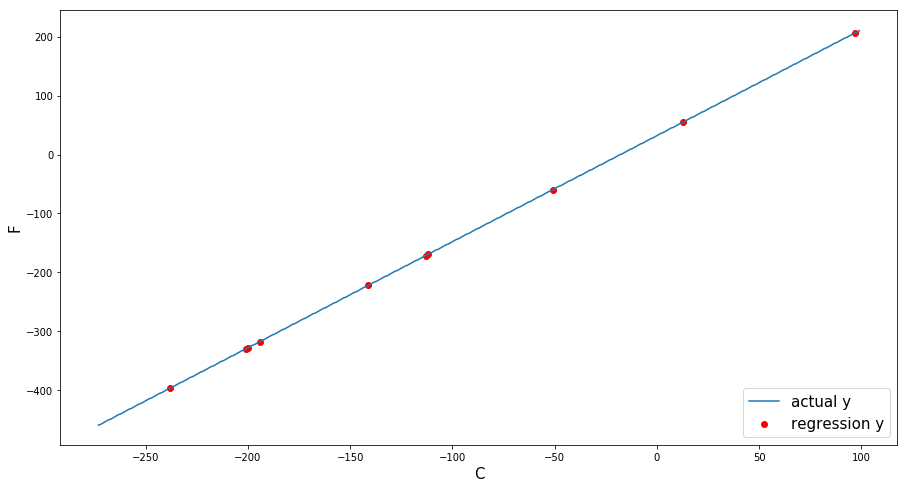

In [11]:
plt.figure(figsize=(15,8))
plt.plot(real_X,real_fx, label='actual y') # the actural curve 
#plt.plot(X,fx, label='predict y') # the prediction curve
plt.scatter(test_X[:,0] ,pred_y,  label='regression y',c='r')
plt.legend(loc='lower right',prop={'size': 15})
plt.ylabel('F',fontsize=15)
plt.xlabel('C',fontsize=15)
plt.show()
plt.close()